<a href="https://colab.research.google.com/github/LilithUmberger/TurtleAerobiomeData/blob/Code-and-Output/Presence_Absence_Matrix_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Code

In [34]:
# Starting fresh with an empty directory and then importing needed files

unlink('/content/*',recursive = TRUE)
path <- '/content'
newfolder <- 'PAUnzipped'
newpath <- file.path(path,newfolder)
dir.create(newpath)
newfolder2 <- 'TurtleAerobiomeData'
newpath2 <- file.path(path,newfolder2)
dir.create(newpath2)
install.packages('git2r')
library(git2r)
url <- 'https://github.com/LilithUmberger/TurtleAerobiomeData.git'
path2 <- '/content/TurtleAerobiomeData'
bn <- 'Code-and-Output'
clone(url, path2, branch = bn)
zip <- '/content/TurtleAerobiomeData/Python/Outputs/PAMatrices.zip'
out <- '/content/PAUnzipped'
unzip(zip,exdir=out)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



cloning into '/content/TurtleAerobiomeData'...
Receiving objects:   1% (5/440),   15 kb
Receiving objects:  11% (49/440),  535 kb
Receiving objects:  21% (93/440),  728 kb
Receiving objects:  31% (137/440), 1281 kb
Receiving objects:  41% (181/440), 1313 kb
Receiving objects:  51% (225/440), 1328 kb
Receiving objects:  61% (269/440), 1328 kb
Receiving objects:  71% (313/440), 1344 kb
Receiving objects:  81% (357/440), 1544 kb
Receiving objects:  91% (401/440), 1584 kb
Receiving objects: 100% (440/440), 1643 kb, done.


Local:    Code-and-Output /content/TurtleAerobiomeData
Remote:   Code-and-Output @ origin (https://github.com/LilithUmberger/TurtleAerobiomeData.git)
Head:     [d685a3f] 2024-09-05: Delete Presence_Absence_Matrix_(R).ipynb

In [35]:
# Function creating individual data frames of each type of sample

combo <- function(fpath,xfile)
{fpname <- as.character(fpath)
fpath <- read.csv(fpath)


if (grepl('Bac',fpname))
{fsplit <- strsplit(fpname,'/')
fucname <- fsplit[[1]][4]
fucname <- as.character(fucname)
fname <- gsub('BacPA.csv','',fucname)}
else if (grepl('Vir',fpname))
{fsplit <- strsplit(fpname,'/')
fucname <- fsplit[[1]][4]
fucname <- as.character(fucname)
fname <- gsub('VirPA.csv','',fucname)}

if (nrow(xfile) == 0)
{xfile <- data.frame(Name = fpath$Name, P.A = fpath$P.A)
names(xfile)[names(xfile) == 'P.A'] <- fname}
else if (nrow(xfile) != 0)
{xfile <- cbind(xfile, fpath$P.A)
names(xfile)[names(xfile) == 'fpath$P.A'] <- fname}
return(xfile)}

In [36]:
# Applies the function to each file in the directory and creates a matrix of
# the finished dataframes

dpath <- '/content/PAUnzipped'
files <- list.files(dpath)
tbxfile <- data.frame()
tvxfile <- data.frame()
abxfile <- data.frame()
avxfile <- data.frame()

for (file in files)
{fpath <- file.path(dpath,file)
fcpath <- as.character(fpath)
if(grepl('Turtle',fcpath) && grepl('Bac',fcpath))
{tbxfile <- combo(fpath,tbxfile)}
else if(grepl('Turtle',fcpath) && grepl('Vir',fcpath))
{tvxfile <- combo(fpath,tvxfile)}
else if(grepl('Air',fcpath) && grepl('Bac',fcpath))
{abxfile <- combo(fpath,abxfile)}
else if(grepl('Air',fcpath) && grepl('Vir',fcpath))
{avxfile <- combo(fpath,avxfile)}}

library(ggplot2)
png('Turtle_Bacteria_PA.png')
ggplot(tbxfile,aes(x=Turtle11+Turtle12+Turtle15+Turtle22+Turtle33+Turtle59+
  Turtle77+Turtle78+Turtle86+Turtle98,y=Name))+
scale_x_continuous(breaks=seq(min(1),max(10),by=1))+
geom_tile()
dev.off()
png('Turtle_Virus_PA.png')
ggplot(tvxfile,aes(x=Turtle11+Turtle12+Turtle15+Turtle22+Turtle33+Turtle59+
  Turtle77+Turtle78+Turtle86+Turtle98,y=Name))+
scale_x_continuous(breaks=seq(min(1),max(10),by=1))+
geom_tile()
dev.off()
png('Air_Bacteria_PA.png')
ggplot(abxfile,aes(x=AirF2+AirF3+AirF5+AirL5,y=Name))+
scale_x_continuous(breaks=seq(min(1),max(4),by=1))+
geom_tile()
dev.off()
png('Air_Virus_PA.png')
ggplot(avxfile,aes(x=AirF2+AirF3+AirF5+AirL5,y=Name))+
scale_x_continuous(breaks=seq(min(1),max(4),by=1))+
geom_tile()
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

# Test Zone

In [37]:
# Working for smallest units

f1path <- '/content/PAUnzipped/Turtle12BacPA.csv'
f2path <- '/content/PAUnzipped/Turtle77BacPA.csv'

file1 <- read.csv(f1path)
file2 <- read.csv(f2path)

f1pname <- as.character(f1path)
f1split <- strsplit(f1pname,'/')
f1ucname <- f1split[[1]][4]
f1ucname <- as.character(f1ucname)
f1name <- gsub('BacPA.csv','',f1ucname)

f2pname <- as.character(f2path)
f2split <- strsplit(f2pname,'/')
f2ucname <- f2split[[1]][4]
f2ucname <- as.character(f2ucname)
f2name <- gsub('BacPA.csv','',f2ucname)

names(file1)[names(file1) == 'P.A'] <- f1name
file1 <- cbind(file1, file2$P.A)
names(file1)[names(file1) == 'file2$P.A'] <- f2name

print(file1)

                      Name Turtle12 Turtle77
1         Acetobacteraceae        0        1
2        Acidobacteriaceae        0        0
3         Actinomycetaceae        0        0
4            Archangiaceae        0        0
5          Azospirillaceae        0        0
6              Bacillaceae        1        0
7        Bradyrhizobiaceae        0        0
8        Brevibacteriaceae        1        1
9         Chitinophagaceae        0        0
10          Comamonadaceae        0        0
11      Corynebacteriaceae        1        1
12        Dermabacteraceae        0        1
13          Dermacoccaceae        0        0
14        Dermatophilaceae        0        0
15             Dietziaceae        1        0
16      Enterobacteriaceae        1        1
17         Enterococcaceae        1        0
18             Erwiniaceae        1        0
19     Geodermatophilaceae        0        1
20              Hafniaceae        1        0
21       Hymenobacteraceae        0        0
22      In

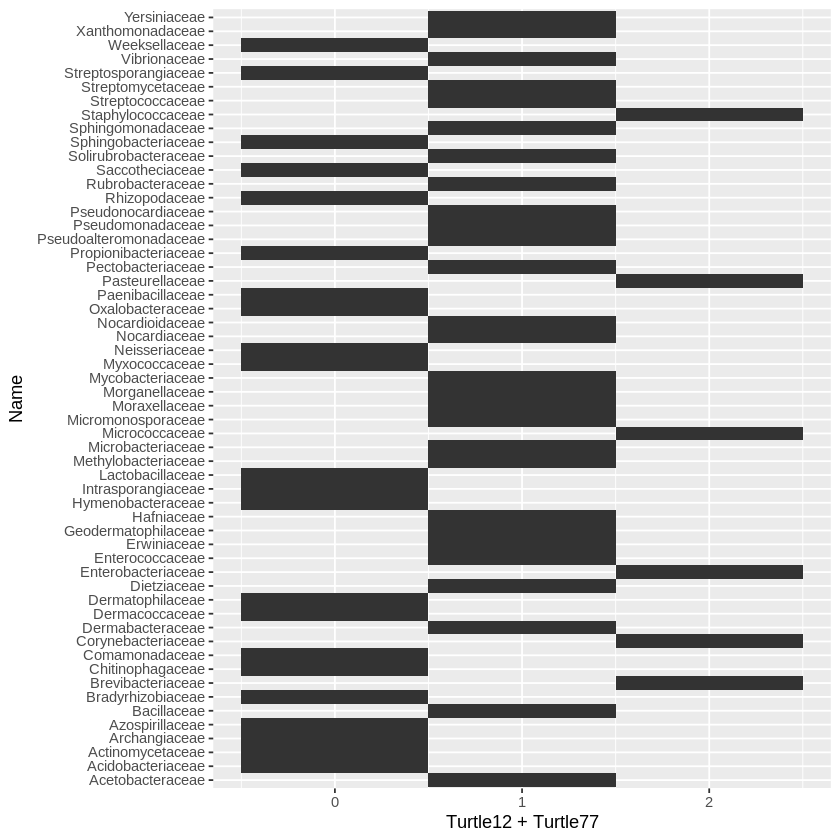

In [38]:
# Graphic code for two
#png('Graphic_For_Two.png')
library(ggplot2)
ggplot(file1,aes(x=Turtle12+Turtle77,y=Name))+geom_tile()
#dev.off()